In [44]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from warnings import filterwarnings
filterwarnings('ignore')

In [45]:
# Load data for subject "Math".
math = pd.read_csv('sample_data/student-mat.csv', sep=";")
print(math.shape)  # (395, 33)
# add an extra column ['subject] to math DataFrame.
math.insert(1, 'subject', ['math'] * 395)
# Load data for subject "Portuguese".
portuguese = pd.read_csv('sample_data/student-por.csv', sep=";")
print(portuguese.shape)  # (649, 33)
# add an extra column ['subject] to portuguese dataframe.
portuguese.insert(1, 'subject', ['por'] * 649)

(395, 33)
(649, 33)


In [46]:
# Concatenate both DataFrame vertically
df = pd.concat([math, portuguese])

In [47]:
df.head()

,school,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,math,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,GP,math,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,GP,math,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,GP,math,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,GP,math,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [48]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#CASE 1: Binary Classification : G3>10: 1 else 0

1.   Élément de liste
2.   Élément de liste



In [49]:
df.G3.describe()

count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: G3, dtype: float64

In [50]:
# handle G3 attrubte to binary
high = df.G3 >= 10
low = df.G3 < 10
df.loc[high,'G3'] = 1
df.loc[low,'G3'] = 0

In [51]:
df.head()

,school,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,math,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,0
1,GP,math,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,0
2,GP,math,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,1
3,GP,math,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,1
4,GP,math,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,1


In [52]:
df.G3.describe()

count    1044.000000
mean        0.779693
std         0.414652
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: G3, dtype: float64

In [53]:
cols = list(df.columns)

In [54]:
categorical_features = []
for f in cols:
    if df[f].dtype != 'int64':
        categorical_features.append(f)
categorical_features

['school',
 'subject',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [67]:
for f in categorical_features:

    #Get binarized columns
     
     df[f] = pd.get_dummies(df[f])

In [68]:
df.head()

,school,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,1,18,1,1,1,4,4,1,...,4,3,4,1,1,3,6,5,6,0
1,0,0,0,17,0,0,0,1,1,0,...,5,3,3,1,1,3,4,5,5,0
2,0,0,0,15,0,0,0,1,1,0,...,4,3,2,2,3,3,10,7,8,1
3,0,0,0,15,0,0,0,4,2,0,...,3,2,2,1,1,5,2,15,14,1
4,0,0,0,16,0,0,0,3,3,0,...,4,3,2,1,2,5,4,6,10,1


In [69]:
features=list(df.columns[:-1])

In [70]:
X = df[features]
y = df['G3']

In [72]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

In [73]:
print (X_train.shape, y_train.shape)

(626, 33) (626,)


### Feature importances with forests of trees

 This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

Feature ranking:
1. feature 32 - G2 (0.286591) 
2. feature 31 - G1 (0.231397) 
3. feature 15 - failures (0.077127) 
4. feature 30 - absences (0.060264) 
5. feature 24 - famrel (0.034714) 
6. feature 3 - age (0.034701) 
7. feature 26 - goout (0.034602) 
8. feature 25 - freetime (0.032452) 
9. feature 29 - health (0.032160) 
10. feature 8 - Fedu (0.032034) 
11. feature 7 - Medu (0.031523) 
12. feature 28 - Walc (0.030577) 
13. feature 14 - studytime (0.028375) 
14. feature 13 - traveltime (0.027132) 
15. feature 27 - Dalc (0.025284) 
16. feature 6 - Pstatus (0.000093) 
17. feature 11 - reason (0.000082) 
18. feature 2 - sex (0.000074) 
19. feature 16 - schoolsup (0.000073) 
20. feature 21 - higher (0.000068) 
21. feature 0 - school (0.000068) 
22. feature 17 - famsup (0.000068) 
23. feature 18 - paid (0.000060) 
24. feature 22 - internet (0.000060) 
25. feature 9 - Mjob (0.000060) 
26. feature 5 - famsize (0.000059) 
27. feature 20 - nursery (0.000059) 
28. feature 23 - romantic (0.00005

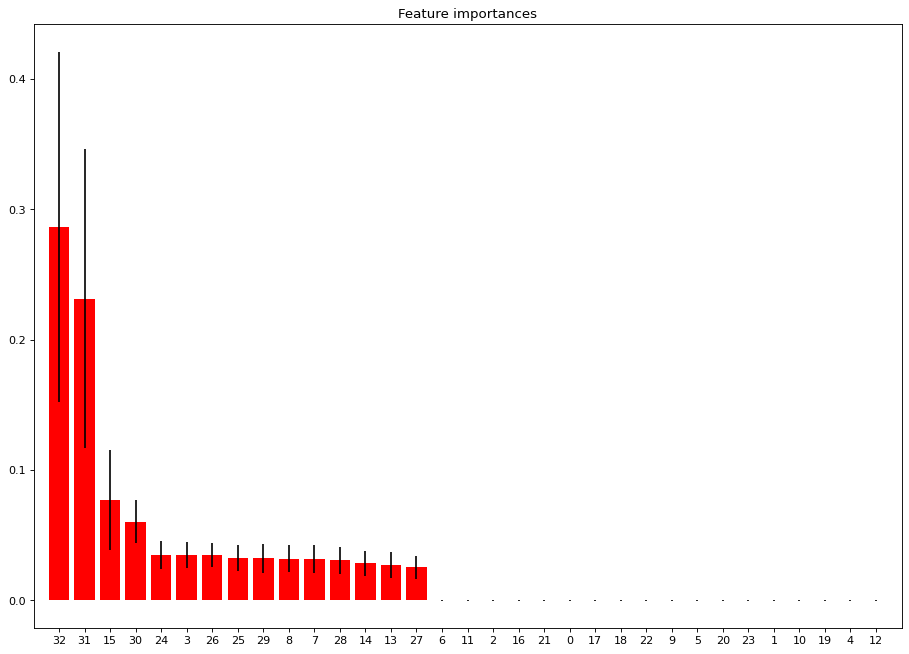

In [74]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [75]:
importances[indices[:5]]

array([0.28659117, 0.23139653, 0.07712659, 0.06026369, 0.03471354])

In [76]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 32 - G2 (0.286591)
2. feature 31 - G1 (0.231397)
3. feature 15 - failures (0.077127)
4. feature 30 - absences (0.060264)
5. feature 24 - famrel (0.034714)


In [77]:
best_features = []
for i in indices[:5]:
    best_features.append(features[i])

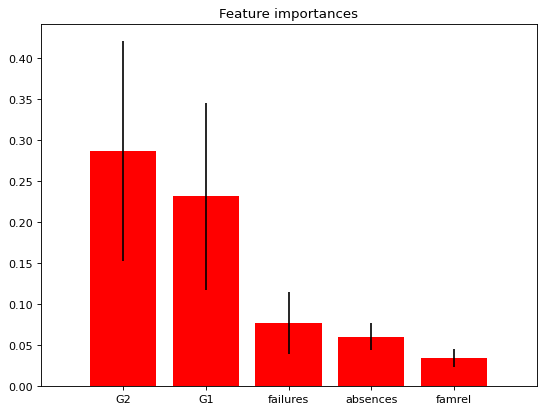

In [78]:
# Plot the top 5 feature importances of the forest
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], 
       color="r",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

###Decision Tree accuracy and time elapsed caculation

In [79]:
t0=time()
print ("DecisionTree")

dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)
# dt = DecisionTreeClassifier(min_samples_split=20,max_depth=5,random_state=99)

clf_dt=dt.fit(X_train,y_train)

print ("Acurracy: ", clf_dt.score(X_test,y_test))
t1=time()
print ("time elapsed: ", t1-t0)

DecisionTree
Acurracy:  0.9090909090909091
time elapsed:  0.014661073684692383


###cross validation for DT

In [82]:
from sklearn.model_selection import cross_val_score
tt0=time()
print ("cross result========")
scores = cross_val_score(dt, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[0.91866029 0.91866029 0.8708134  0.90909091 0.85576923]
0.8945988222304011
time elapsed:  0.03393197059631348


###Tuning our hyperparameters using GridSearch

In [84]:
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])

parameters = {
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(X_test)

print (classification_report(y_test, predictions))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best score: 0.936
Best parameters set:
	clf__max_depth: 5
	clf__min_samples_leaf: 3
	clf__min_samples_split: 5
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        88
           1       0.93      0.97      0.95       330

    accuracy                           0.92       418
   macro avg       0.89      0.85      0.87       418
weighted avg       0.91      0.92      0.91       418



###Naive Bayes accuracy and time elapsed caculation

In [85]:
t4=time()
print ("NaiveBayes")
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print ("Acurracy: ", clf_nb.score(X_test,y_test))
t5=time()
print ("time elapsed: ", t5-t4)

NaiveBayes
Acurracy:  0.8014354066985646
time elapsed:  0.023049592971801758


In [86]:
tt0=time()
print ("cross result========")
scores = cross_val_score(nb, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[0.79904306 0.79425837 0.784689   0.784689   0.80769231]
0.7940743467059257
time elapsed:  0.03960466384887695


###KNN accuracy and time elapsed caculation

In [87]:
t6=time()
print ("KNN")
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier()
clf_knn=knn.fit(X_train, y_train)
print ("Acurracy: ", clf_knn.score(X_test,y_test) )
t7=time()
print ("time elapsed: ", t7-t6)

KNN
Acurracy:  0.9066985645933014
time elapsed:  0.03201913833618164


In [88]:
tt0=time()
print ("cross result========")
scores = cross_val_score(knn, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[0.89952153 0.93301435 0.89473684 0.88038278 0.87019231]
0.8955695620169305
time elapsed:  0.15736603736877441


# Cas 2 : Regression

In [90]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import *
from sklearn import metrics

In [91]:
# Load data for subject "Math".
math = pd.read_csv('sample_data/student-mat.csv', sep=";")
print(math.shape)  # (395, 33)
# add an extra column ['subject] to math DataFrame.
math.insert(1, 'subject', ['math'] * 395)
# Load data for subject "Portuguese".
portuguese = pd.read_csv('sample_data/student-por.csv', sep=";")
print(portuguese.shape)  # (649, 33)
# add an extra column ['subject] to portuguese dataframe.
portuguese.insert(1, 'subject', ['por'] * 649)

(395, 33)
(649, 33)


In [92]:
# Concatenate both DataFrame vertically
df = pd.concat([math, portuguese])

In [93]:
df.head()

,school,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,math,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,GP,math,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,GP,math,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,GP,math,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,GP,math,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [94]:
cols = list(df.columns)

In [95]:
categorical_features = []
for f in cols:
    if df[f].dtype != 'int64':
        categorical_features.append(f)
categorical_features

['school',
 'subject',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [104]:
for f in categorical_features:
  df[f]= pd.get_dummies(df[f])


    #Get binarized columns
    

In [105]:
df.head()

,school,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,1,18,1,1,1,4,4,1,...,4,3,4,1,1,3,6,5,6,6
1,0,0,0,17,0,0,0,1,1,0,...,5,3,3,1,1,3,4,5,5,6
2,0,0,0,15,0,0,0,1,1,0,...,4,3,2,2,3,3,10,7,8,10
3,0,0,0,15,0,0,0,4,2,0,...,3,2,2,1,1,5,2,15,14,15
4,0,0,0,16,0,0,0,3,3,0,...,4,3,2,1,2,5,4,6,10,10


In [106]:
features=list(df.columns[:-1])

In [107]:
X = df[features]
y = df['G3']

In [108]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [109]:
print (X_train.shape, y_train.shape)

(730, 33) (730,)


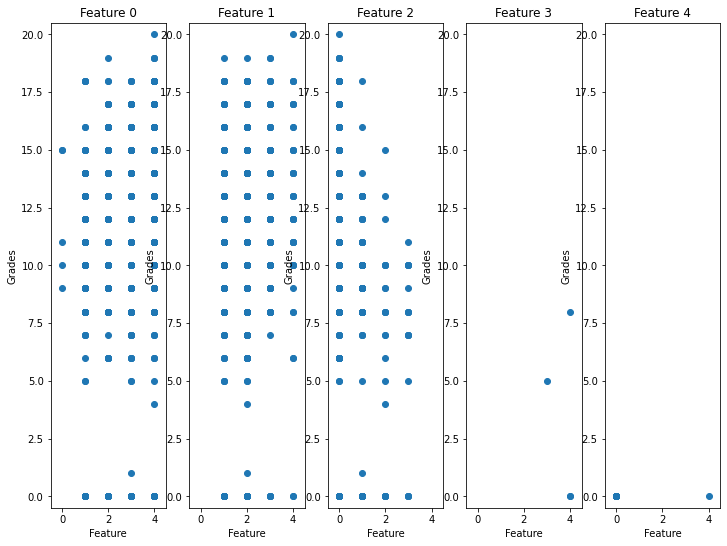

In [111]:
from sklearn.feature_selection import *
fs=SelectKBest(score_func=f_regression,k=5)
X_new=fs.fit_transform(X_train,y_train)
z =  zip(fs.get_support(),features)
print (z)

x_min, x_max = X_new[:,0].min() - .5, X_new[:, 0].max() + .5
y_min, y_max = y_train.min() - .5, y_train.max() + .5
#fig=plt.figure()
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Two subplots, unpack the axes array immediately
fig, axes = plt.subplots(1,5)
fig.set_size_inches(12,12)

for i in range(5):
    axes[i].set_aspect('equal')
    axes[i].set_title('Feature {}'.format(i))
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Grades')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_new[:,i],y_train)

In [112]:
best_features = []
for bool,feature in z:
    if bool:
        best_features.append(feature)

In [113]:
correlated = best_features + ['G3']

In [114]:
correlated

['Medu', 'studytime', 'failures', 'G1', 'G2', 'G3']

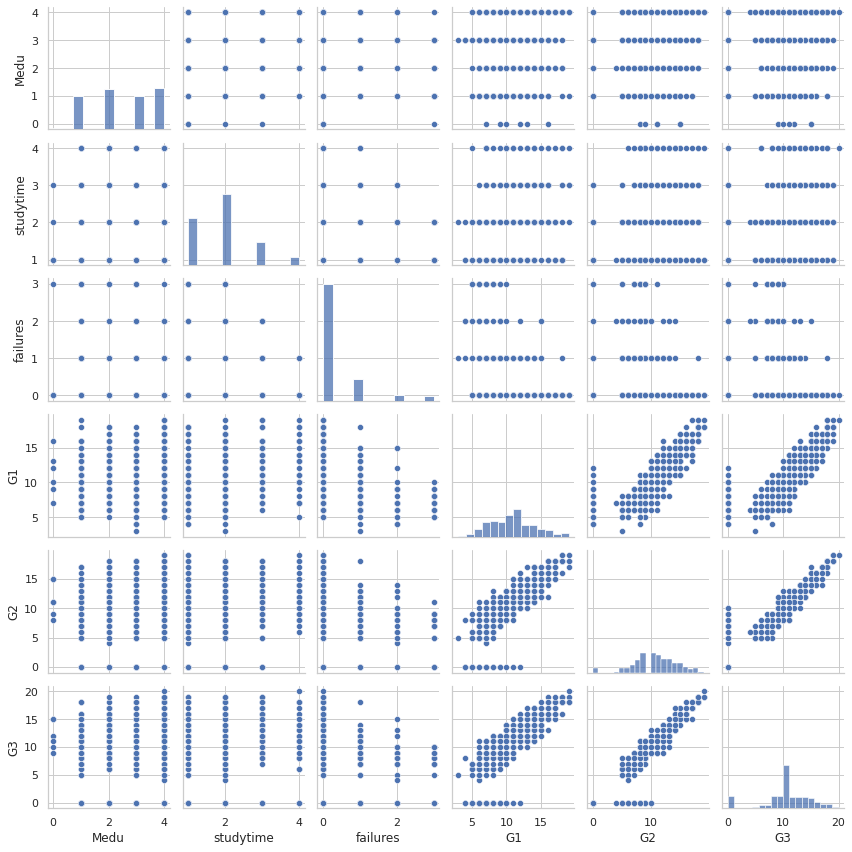

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
df= df.loc[~df.index.duplicated(), :]
sns.pairplot(df[correlated], size=2.0);
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

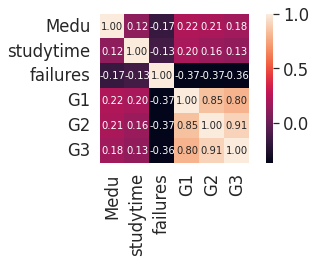

In [127]:
import numpy as np
cm = np.corrcoef(df[correlated].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 10},
            yticklabels=correlated,
            xticklabels=correlated)

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

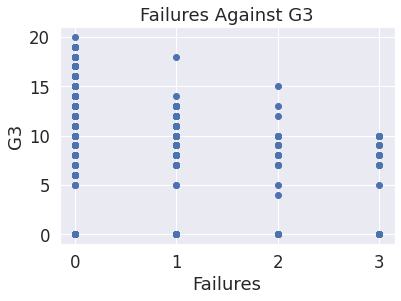

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['failures'], df['G3'])
plt.xlabel('Failures')
plt.ylabel('G3')
plt.title('Failures Against G3')
plt.show()

In [130]:
from sklearn.model_selection import train_test_split

X = df[features].values
y = df['G3'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [131]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

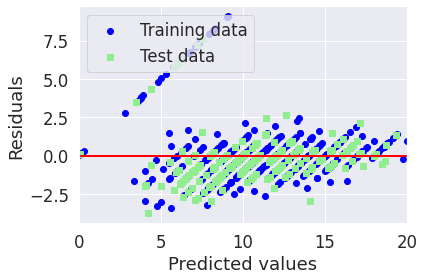

In [132]:
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=20, lw=2, color='red')
plt.xlim([0, 20])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [133]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 3.108, test: 3.014
R^2 train: 0.837, test: 0.830


#Using regularized methods for regression

In [134]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[ 0.          0.          0.         -0.10266246  0.          0.
  0.         -0.00158368 -0.01118527  0.          0.          0.
  0.          0.01634789 -0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.03522673 -0.
  0.02215688  0.15613454  0.97302978]


In [135]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 3.176, test: 2.960
R^2 train: 0.833, test: 0.833


In [136]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(ridge.coef_)

[ 0.0721039   0.0721039   0.0721039  -0.16787136  0.0721039   0.0721039
  0.0721039  -0.02529506 -0.08571546  0.0721039   0.0721039   0.0721039
  0.0721039   0.15997556 -0.07730247 -0.10583499  0.0721039   0.0721039
  0.0721039   0.0721039   0.0721039   0.0721039   0.0721039   0.0721039
  0.08303898  0.01698223 -0.00559481 -0.05036575  0.12360524 -0.06308183
  0.027077    0.17321603  0.96933214]


In [137]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
en.fit(X_train, y_train)
y_train_pred = en.predict(X_train)
y_test_pred = en.predict(X_test)
print(en.coef_)

[ 0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.          0.          0.
  0.          0.         -0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
  0.01239175  0.19245702  0.88246942]


#Decision tree regression

In [138]:
X = df[features].values
y = df['G3'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [139]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 2.778, test: 3.406
R^2 train: 0.854, test: 0.808


#Random forest regression

In [140]:
X = df[features].values
y = df['G3'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [141]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.335, test: 2.645
R^2 train: 0.982, test: 0.851


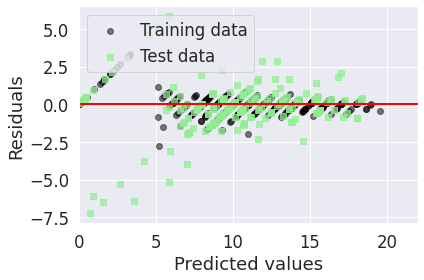

In [142]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='black', 
            marker='o', 
            s=35,
            alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='lightgreen', 
            marker='s', 
            s=35,
            alpha=0.7,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=22, lw=2, color='red')
plt.xlim([0, 22])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

#Linear Regression


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print ('R-squared:', regressor.score(X_test, y_test))

R-squared: 0.8159258876808426


#Cross Validation

In [150]:
scores = cross_val_score(regressor, X, y, cv=5)
print ( "Average of scores: ", scores.mean() )
print ("Cross validation scores: ", scores )

Average of scores:  0.8129625655183041
Cross validation scores:  [0.89786221 0.82171827 0.69616143 0.81561674 0.83345418]


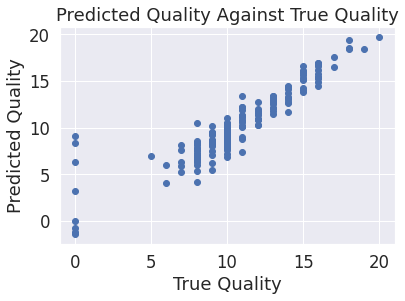

In [151]:
plt.scatter(y_test,y_predictions)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality')
plt.show()
